In [1]:
import pandas as pd
import numpy as np

In [2]:
user_info = pd.read_csv('data/jdata_user_basic_info.csv')
sku_info = pd.read_csv('data/jdata_sku_basic_info.csv')
user_action = pd.read_csv('data/jdata_user_action.csv', parse_dates=['a_date'])
user_order = pd.read_csv('data/jdata_user_order.csv', parse_dates=['o_date'])
user_comment = pd.read_csv('data/jdata_user_comment_score.csv', parse_dates=['comment_create_tm'])

In [3]:
user_info.head()

,user_id,age,sex,user_lv_cd
0,1,3,2,3
1,2,3,2,3
2,3,3,0,5
3,4,3,2,3
4,5,4,2,2


## 观察数据情况
### （1）缺失情况 （2）分布情况 *（3）与标签值的关联情况

### （1）缺失情况

In [4]:
print("唯一user_id个数",user_info["user_id"].nunique())
print("唯一sku_id个数",sku_info["sku_id"].nunique())
print("shape of user_action", user_action.shape)
print("shape of user_order", user_order.shape)
print("shape of user_comment", user_comment.shape)

print("user_action数据集中唯一user_id个数：", user_action["user_id"].nunique(),"\n", "user_action数据集中唯一sku_id个数：", user_action["sku_id"].nunique())
print("user_order数据集中唯一user_id个数：", user_order["user_id"].nunique(),"\n", "user_order数据集中唯一sku_id个数：", user_order["sku_id"].nunique())
print("user_comment数据集中唯一user_id个数：", user_comment["user_id"].nunique())

唯一user_id个数 98924
唯一sku_id个数 99412
shape of user_action (6944141, 5)
shape of user_order (792723, 6)
shape of user_comment (224284, 4)
user_action数据集中唯一user_id个数： 93453 
 user_action数据集中唯一sku_id个数： 99133
user_order数据集中唯一user_id个数： 98924 
 user_order数据集中唯一sku_id个数： 25474
user_comment数据集中唯一user_id个数： 42191


In [5]:
sku_info["cate"].unique()

array([ 71,  46,  83, 101,   1,  30], dtype=int64)

In [6]:
42191/99412

0.42440550436567015

In [7]:
def missingValues(data, fea, val):
    return data[data[fea]==-1].shape[0]/data.shape[0]

In [8]:
#user_info，sku_info属性的缺失情况
print("数据缺失情况：\n", user_info.isnull().sum())

数据缺失情况：
 user_id       0
age           0
sex           0
user_lv_cd    0
dtype: int64


In [9]:
missingValues(user_info, "age", -1)

0.24903966681492865

In [10]:
missingValues(sku_info, "para_3", -1)

0.8101335854826379

In [11]:
sku_info.head()

,sku_id,price,cate,para_1,para_2,para_3
0,1,364.2,71,247.95,-1,-1
1,2,36.7,46,6.40,-1,-1
2,3,953.3,71,178.92,-1,-1
3,4,110.6,83,6366.88,-1,-1
4,5,241.5,71,31.74,-1,-1


### （2）分布情况

In [12]:
#用户行为(行为次数)的时间分布情况

In [13]:
user_action_cate = user_action.merge(sku_info[["sku_id", "cate"]], on="sku_id", how="left")

In [14]:
user_action_cate.head()

,user_id,sku_id,a_date,a_num,a_type,cate
0,1,80036,2017-04-14,4,1,101
1,1,96959,2017-01-12,2,1,101
2,1,8017,2017-03-09,1,1,101
3,1,80036,2017-04-30,6,1,101
4,1,16607,2017-01-12,3,1,101


In [15]:
user_action_num = user_action_cate.groupby("a_date")["a_num"].sum().reset_index().rename(columns={"a_num":"action_num"})

In [16]:
user_action_num_t = user_action_cate.groupby(["a_date", "a_type"])["a_num"].sum().reset_index().rename(columns={"a_num":"action_num_t"})

In [18]:
user_action_num.head()

,a_date,action_num
0,2016-05-01,15521
1,2016-05-02,15875
2,2016-05-03,17303
3,2016-05-04,16176
4,2016-05-05,17783


In [19]:
user_action_num_t.head()

,a_date,a_type,action_num_t
0,2016-05-01,1,15446
1,2016-05-01,2,75
2,2016-05-02,1,15756
3,2016-05-02,2,119
4,2016-05-03,1,17178


In [20]:
import matplotlib.pyplot as plt

D:\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


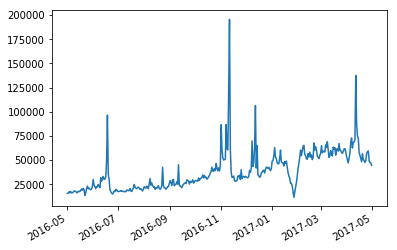

In [21]:
plt.plot(user_action_num["a_date"], user_action_num["action_num"])
plt.gcf().autofmt_xdate() ###***自动旋转日期标志
plt.show()

In [22]:
user_action_num.head()

,a_date,action_num
0,2016-05-01,15521
1,2016-05-02,15875
2,2016-05-03,17303
3,2016-05-04,16176
4,2016-05-05,17783


In [23]:
user_action_num["log1_num"] = np.log1p(user_action_num["action_num"])

In [24]:
user_action_num.head()

,a_date,action_num,log1_num
0,2016-05-01,15521,9.650014
1,2016-05-02,15875,9.672564
2,2016-05-03,17303,9.758693
3,2016-05-04,16176,9.691346
4,2016-05-05,17783,9.786054


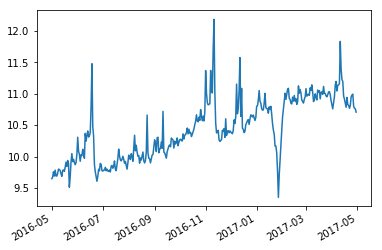

In [25]:
plt.plot(user_action_num["a_date"], user_action_num["log1_num"])
plt.gcf().autofmt_xdate() ###***自动旋转日期标志
plt.show()

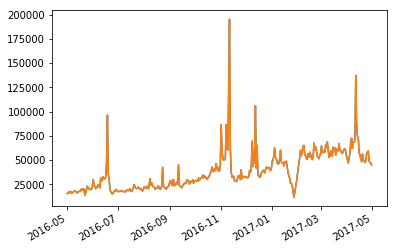

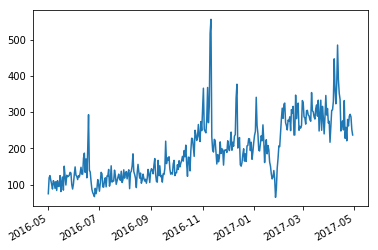

In [26]:
plt.plot(user_action_num_t[user_action_num_t["a_type"]==1]["a_date"], user_action_num_t[user_action_num_t["a_type"]==1]["action_num_t"])
plt.gcf().autofmt_xdate() ###***自动旋转日期标志
plt.plot(user_action_num_t[user_action_num_t["a_type"]==1]["a_date"], user_action_num_t[user_action_num_t["a_type"]==1]["action_num_t"])
plt.gcf().autofmt_xdate() ###***自动旋转日期标志
plt.show()
plt.plot(user_action_num_t[user_action_num_t["a_type"]==2]["a_date"], user_action_num_t[user_action_num_t["a_type"]==2]["action_num_t"])
plt.gcf().autofmt_xdate() ###***自动旋转日期标志
plt.show()

In [27]:
###***训练集的数据分布要尽量与预测时间点（段）的数据分布保持一致，因此，做事先数据分布很重要

In [28]:
#用户订单量时间分布情况

In [29]:
user_order.head()

,user_id,sku_id,o_id,o_date,o_area,o_sku_num
0,1,80036,480066,2017-03-09,14,1
1,1,16607,106933,2017-01-12,14,1
2,1,80036,542604,2017-04-14,14,1
3,1,80036,196335,2017-04-30,14,1
4,1,80036,42502,2017-03-22,14,2


In [30]:
user_order_num = user_order.groupby("o_date")["o_sku_num"].sum().reset_index().rename(columns={"o_sku_num":"user_order_sum"})

In [31]:
user_order_num.head()

,o_date,user_order_sum
0,2016-05-01,1692
1,2016-05-02,1516
2,2016-05-03,1848
3,2016-05-04,1466
4,2016-05-05,1682


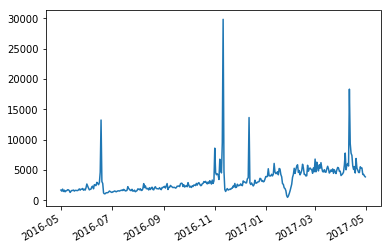

In [32]:
plt.plot(user_order_num["o_date"], user_order_num["user_order_sum"])
plt.gcf().autofmt_xdate() ###***自动旋转日期标志
plt.show()

### （3）与标签值关联情况

In [33]:
#切分数据集
label_data_list = []
train_data_list = []
"""
user_info
sku_info
user_action
user_order
user_comment
"""

'\nuser_info\nsku_info\nuser_action\nuser_order\nuser_comment\n'

In [34]:
user_action.head()

,user_id,sku_id,a_date,a_num,a_type
0,1,80036,2017-04-14,4,1
1,1,96959,2017-01-12,2,1
2,1,8017,2017-03-09,1,1
3,1,80036,2017-04-30,6,1
4,1,16607,2017-01-12,3,1


In [35]:
sku_info.head()

,sku_id,price,cate,para_1,para_2,para_3
0,1,364.2,71,247.95,-1,-1
1,2,36.7,46,6.40,-1,-1
2,3,953.3,71,178.92,-1,-1
3,4,110.6,83,6366.88,-1,-1
4,5,241.5,71,31.74,-1,-1


In [36]:
sku_info.shape

(99412, 6)

In [37]:
sku_info = sku_info.drop_duplicates(subset=["sku_id"],keep='first',inplace=False)

In [38]:
sku_info.shape

(99412, 6)

In [39]:
user_order.shape

(792723, 6)

In [40]:
user_order["o_sku_num"].unique()

array([  1,   2,   4,   3,   5,   6,   8,  12,   9,  22,  11,   7,  10,
        15,  13,  30,  16, 100,  18,  48,  14,  31,  19,  40,  80,  25,
        20,  17,  24,  23,  47,  21,  29,  33,  61,  26,  50, 103,  35,
        28,  99,  41,  60,  85,  90,  63, 180, 200, 185,  34,  27],
      dtype=int64)

In [41]:
user_order_cate = user_order.merge(sku_info[["sku_id", "price", "cate", "para_1"]], on="sku_id", how="left")
user_order_cate.head()

,user_id,sku_id,o_id,o_date,o_area,o_sku_num,price,cate,para_1
0,1,80036,480066,2017-03-09,14,1,511.8,101,189.25
1,1,16607,106933,2017-01-12,14,1,557.0,101,442.63
2,1,80036,542604,2017-04-14,14,1,511.8,101,189.25
3,1,80036,196335,2017-04-30,14,1,511.8,101,189.25
4,1,80036,42502,2017-03-22,14,2,511.8,101,189.25


In [42]:
user_order_cate.shape

(792723, 9)

In [43]:
#用来提取标签的数据集
def is_buy(row):
    if (row == 101) | (row == 30):
        return 1
    else:
        return 0
    
user_order_cate["is_buy"] = user_order_cate["cate"].apply(is_buy)

L_data1 = user_order_cate[(user_order_cate["o_date"]>=pd.to_datetime("20170301"))&(user_order_cate["o_date"]<=pd.to_datetime("20170331"))]
L_data2 = user_order_cate[(user_order_cate["o_date"]>=pd.to_datetime("20170129"))&(user_order_cate["o_date"]<=pd.to_datetime("20170228"))]
L_data3 = user_order_cate[(user_order_cate["o_date"]>=pd.to_datetime("20161201"))&(user_order_cate["o_date"]<=pd.to_datetime("20161231"))]
###***时间大小比较  user_order_cate["o_date"]<=pd.to_datetime("20161231")

In [44]:
#提取标签1  写成函数，可重复使用

In [45]:
L_data1.head()

,user_id,sku_id,o_id,o_date,o_area,o_sku_num,price,cate,para_1,is_buy
0,1,80036,480066,2017-03-09,14,1,511.8,101,189.25,1
4,1,80036,42502,2017-03-22,14,2,511.8,101,189.25,1
7,3,71817,403068,2017-03-03,26,2,106.5,83,9.03,0
8,3,18217,403068,2017-03-03,26,2,88.3,83,9.73,0
9,3,2816,403068,2017-03-03,26,1,150.1,83,7.16,0


In [46]:
#1.user_info
#2.对于L_data,以"user_id"为groupby,合并.计算"is_buy"之和，如果大于等于1，则返回1，否则返回0
#3.user_info.merge(user_id, on="user_id", how="left").fillna(0)
def getLabel(L_data, user_info):
    user_info = user_info.drop_duplicates(subset=["user_id"], keep="first", inplace=False)
    L_data_group = L_data.groupby("user_id")["is_buy"].sum().reset_index()
    L_data_group["is_buy"] = L_data_group["is_buy"].apply(lambda x: 1 if x>=1 else 0)  ###***用lambda表达如果一个数大于等于1返回1，否则返回0
    L_data_group = L_data_group.drop_duplicates(subset=["user_id"], keep="first", inplace=False)
    userInfo_isBuy_label = user_info.merge(L_data_group, on="user_id", how="left").fillna(0)
    return userInfo_isBuy_label

In [47]:
userInfo_isBuy_label1 = getLabel(L_data1, user_info)

In [48]:
userInfo_isBuy_label1.head()

,user_id,age,sex,user_lv_cd,is_buy
0,1,3,2,3,1.0
1,2,3,2,3,0.0
2,3,3,0,5,0.0
3,4,3,2,3,0.0
4,5,4,2,2,0.0


In [49]:
order_comment = user_order.merge(user_comment, on=["user_id", "o_id"], how="left")
order_comment.head()

,user_id,sku_id,o_id,o_date,o_area,o_sku_num,comment_create_tm,score_level
0,1,80036,480066,2017-03-09,14,1,NaT,NaN
1,1,16607,106933,2017-01-12,14,1,NaT,NaN
2,1,80036,542604,2017-04-14,14,1,NaT,NaN
3,1,80036,196335,2017-04-30,14,1,NaT,NaN
4,1,80036,42502,2017-03-22,14,2,NaT,NaN


In [50]:
#用来提取训练集的数据集
T_action_data1 = user_action[(user_action["a_date"]>=pd.to_datetime("20161101"))&(user_action["a_date"]<=pd.to_datetime("20170228"))]
T_action_data2 = user_action[(user_action["a_date"]>=pd.to_datetime("20161001"))&(user_action["a_date"]<=pd.to_datetime("20170128"))]
T_action_data3 = user_action[(user_action["a_date"]>=pd.to_datetime("20160901"))&(user_action["a_date"]<=pd.to_datetime("20161130"))]

order_comment = user_order.merge(user_comment, on=["o_id"], how="left")

T_order_comment_data1 = order_comment[(order_comment["o_date"]>=pd.to_datetime("20161101"))&(order_comment["o_date"]<=pd.to_datetime("20170228"))]
T_order_comment_data2 = order_comment[(order_comment["o_date"]>=pd.to_datetime("20161001"))&(order_comment["o_date"]<=pd.to_datetime("20170128"))]
T_order_comment_data3 = order_comment[(order_comment["o_date"]>=pd.to_datetime("20160901"))&(order_comment["o_date"]<=pd.to_datetime("20161130"))]

In [51]:
#基本属性特征(包括用户基本属性和商品基本属性)

In [52]:
import matplotlib.pyplot as plt

In [53]:
###***特征和标签值（分类问题可化为标签的个数）的关系
def feature_label_relev(data, feature, label):
    feature_label_num = data.groupby(feature)[label].mean().reset_index().rename(columns={label:feature+"_"+"_"+label+"_"+"num"})
    plt.scatter(feature_label_num[feature], feature_label_num[feature+"_"+"_"+label+"_"+"num"])
    plt.title(str(feature))
    plt.xlabel(feature)
    plt.ylabel(feature+"_"+"_"+label+"_"+"num")
    plt.show()

In [54]:
#行为特征

In [55]:
T_action_data1.head()

,user_id,sku_id,a_date,a_num,a_type
1,1,96959,2017-01-12,2,1
4,1,16607,2017-01-12,3,1
5,1,16607,2017-02-12,2,1
19,3,2922,2016-12-08,4,1
23,3,11366,2017-02-20,1,1


In [56]:
userInfo_isBuy_label1.head()

,user_id,age,sex,user_lv_cd,is_buy
0,1,3,2,3,1.0
1,2,3,2,3,0.0
2,3,3,0,5,0.0
3,4,3,2,3,0.0
4,5,4,2,2,0.0


In [57]:
sku_info.head()

,sku_id,price,cate,para_1,para_2,para_3
0,1,364.2,71,247.95,-1,-1
1,2,36.7,46,6.40,-1,-1
2,3,953.3,71,178.92,-1,-1
3,4,110.6,83,6366.88,-1,-1
4,5,241.5,71,31.74,-1,-1


In [64]:
d_user_action = T_action_data1
user_info_is_buy_label = userInfo_isBuy_label1

d_user_action_info = d_user_action.merge(sku_info[["sku_id", "price", "cate", "para_1"]], on="sku_id", how="left")

#求出现次数最多的类型
def get_maxVal(row):
    return row.mode()[0]
def get_maxNum(row):
    return max(row)

def action_egg(d_user_action, user_info_is_buy_label, sku_info):
    for feature in d_user_action_info.columns.values:
        print(feature)
        if feature in ["a_num", "price", "para_1"]:
            action_feature_1 = d_user_action_info.groupby("user_id")[feature].sum().reset_index().rename(columns={feature:feature+"_"+"sum"})
            action_feature_2 = d_user_action_info.groupby("user_id")[feature].mean().reset_index().rename(columns={feature:feature+"_"+"mean"})
            action_feature_3 = d_user_action_info.groupby("user_id")[feature].max().reset_index().rename(columns={feature:feature+"_"+"max"})
            action_feature_4 = d_user_action_info.groupby("user_id")[feature].min().reset_index().rename(columns={feature:feature+"_"+"min"})
            action_feature_5 = d_user_action_info.groupby("user_id")[feature].median().reset_index().rename(columns={feature:feature+"_"+"median"})

            d_user_action_info_atype1 = d_user_action_info[d_user_action_info["a_type"]==1]
            action_feature_6 = d_user_action_info_atype1.groupby("user_id")[feature].sum().reset_index().rename(columns={feature:feature+"_"+"a_type1_sum"})
            action_feature_7 = d_user_action_info_atype1.groupby("user_id")[feature].mean().reset_index().rename(columns={feature:feature+"_"+"a_type1_mean"})
            action_feature_8 = d_user_action_info_atype1.groupby("user_id")[feature].max().reset_index().rename(columns={feature:feature+"_"+"a_type1_max"})
            action_feature_9 = d_user_action_info_atype1.groupby("user_id")[feature].min().reset_index().rename(columns={feature:feature+"_"+"a_type1_min"})
            action_feature_10 = d_user_action_info_atype1.groupby("user_id")[feature].median().reset_index().rename(columns={feature:feature+"_"+"a_type1_median"})

            d_user_action_info_atype2 = d_user_action_info[d_user_action_info["a_type"]==2]
            action_feature_11 = d_user_action_info_atype2.groupby("user_id")[feature].sum().reset_index().rename(columns={feature:feature+"_"+"a_type2_sum"})
            action_feature_12 = d_user_action_info_atype2.groupby("user_id")[feature].mean().reset_index().rename(columns={feature:feature+"_"+"a_type2_mean"})
            action_feature_13 = d_user_action_info_atype2.groupby("user_id")[feature].max().reset_index().rename(columns={feature:feature+"_"+"a_type2_max"})
            action_feature_14 = d_user_action_info_atype2.groupby("user_id")[feature].min().reset_index().rename(columns={feature:feature+"_"+"a_type2_min"})
            action_feature_15 = d_user_action_info_atype2.groupby("user_id")[feature].median().reset_index().rename(columns={feature:feature+"_"+"a_type2_median"})

            action_features = user_info_is_buy_label.merge(action_feature_1, on="user_id", how="left").fillna(-1)
            action_features = action_features.merge(action_feature_2, on="user_id", how="left").fillna(-1)
            action_features = action_features.merge(action_feature_3, on="user_id", how="left").fillna(-1)
            action_features = action_features.merge(action_feature_4, on="user_id", how="left").fillna(-1)
            action_features = action_features.merge(action_feature_5, on="user_id", how="left").fillna(-1)
            action_features = action_features.merge(action_feature_6, on="user_id", how="left").fillna(-1)
            action_features = action_features.merge(action_feature_7, on="user_id", how="left").fillna(-1)
            action_features = action_features.merge(action_feature_8, on="user_id", how="left").fillna(-1)
            action_features = action_features.merge(action_feature_9, on="user_id", how="left").fillna(-1)
            action_features = action_features.merge(action_feature_10, on="user_id", how="left").fillna(-1)
            action_features = action_features.merge(action_feature_11, on="user_id", how="left").fillna(-1)
            action_features = action_features.merge(action_feature_12, on="user_id", how="left").fillna(-1)
            action_features = action_features.merge(action_feature_13, on="user_id", how="left").fillna(-1)
            action_features = action_features.merge(action_feature_14, on="user_id", how="left").fillna(-1)
            action_features = action_features.merge(action_feature_15, on="user_id", how="left").fillna(-1)
            
        if feature in ["sku_id", "a_type", "cate"]:
            action_feature_16 = d_user_action_info.groupby("user_id")[feature].nunique().reset_index().rename(columns={feature:feature+"_nunique"})
            action_feature_17 = d_user_action_info.groupby("user_id")[feature].apply(get_maxVal).reset_index().rename(columns={feature:feature+"_maxVal"})
            action_feature_18 = d_user_action_info.groupby("user_id")[feature].apply(get_maxNum).reset_index().rename(columns={feature:feature+"_maxNum"})
            
            action_features = user_info_is_buy_label.merge(action_feature_16, on="user_id", how="left").fillna(-1)
            action_features = action_features.merge(action_feature_17, on="user_id", how="left").fillna(-1)
            action_features = action_features.merge(action_feature_18, on="user_id", how="left").fillna(-1)
        
        

    return action_features

In [65]:
action_features = action_egg(d_user_action, user_info_is_buy_label, sku_info)

user_id
sku_id
a_date
a_num
a_type
price
cate
para_1


In [66]:
action_features.head()

,user_id,age,sex,user_lv_cd,is_buy,para_1_sum,para_1_mean,para_1_max,para_1_min,para_1_median,para_1_a_type1_sum,para_1_a_type1_mean,para_1_a_type1_max,para_1_a_type1_min,para_1_a_type1_median,para_1_a_type2_sum,para_1_a_type2_mean,para_1_a_type2_max,para_1_a_type2_min,para_1_a_type2_median
0,1,3,2,3,1.0,968.40,322.800000,442.63,83.14,442.63,968.40,322.800000,442.63,83.14,442.63,-1.00,-1.000000,-1.00,-1.00,-1.00
1,2,3,2,3,0.0,-1.00,-1.000000,-1.00,-1.00,-1.00,-1.00,-1.000000,-1.00,-1.00,-1.00,-1.00,-1.000000,-1.00,-1.00,-1.00
2,3,3,0,5,0.0,6203.89,103.398167,678.35,3.95,18.42,5222.82,91.628421,678.35,3.95,17.09,981.07,327.023333,678.35,143.66,159.06
3,4,3,2,3,0.0,895.50,179.100000,393.50,41.27,156.65,895.50,179.100000,393.50,41.27,156.65,-1.00,-1.000000,-1.00,-1.00,-1.00
4,5,4,2,2,0.0,-1.00,-1.000000,-1.00,-1.00,-1.00,-1.00,-1.000000,-1.00,-1.00,-1.00,-1.00,-1.000000,-1.00,-1.00,-1.00


In [60]:
#订单评论特征